<a href="https://colab.research.google.com/github/LonghuaHu/deep-learning/blob/master/comparison_of_10000mnist_data_0328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Quaternion CNN

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
import h5py 
#data
f = h5py.File('/content/drive/My Drive/Colab Notebooks/new_quaternionImages.mat','r') 

X_q = f['quaternionImages'][:]
#data = data.T
print(X.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/new_quaternionImagesLabels.mat','r') 
y_q = f['quaternionImagesLabels'][:]
y_q = y_q.T
print(y.shape)



(10000, 4, 14, 14)
(10000, 1)


In [0]:
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
X_q, y_q, test_size=0.2, random_state=42)

In [39]:
print(X_train_q.shape, X_test_q.shape, y_train_q.shape, y_test_q.shape)

(8000, 12, 14, 14) (2000, 12, 14, 14) (8000, 1) (2000, 1)


In [40]:
X_train_q = X_train_q.reshape(X_train_q.shape[0], X_train_q.shape[1], X_train_q.shape[2], X_train_q.shape[3],1)
X_test_q = X_test_q.reshape(X_test_q.shape[0], X_train_q.shape[1], X_train_q.shape[2], X_train_q.shape[3],1)
#training_labels = training_labels[0]
y_train_q.astype(int)
y_test_q.astype(int)
print('Number of training examples: ' + str(X_train_q.shape[0]))
print('Training images shape:' + str(X_train_q.shape))
print('Training labels shape:' + str(y_train_q.shape))
print('Test images shape:' + str(X_test_q.shape))
print('Test labels shape:' + str(y_test_q.shape))

Number of training examples: 8000
Training images shape:(8000, 12, 14, 14, 1)
Training labels shape:(8000, 1)
Test images shape:(2000, 12, 14, 14, 1)
Test labels shape:(2000, 1)


In [0]:
import os
import tensorflow as tf
from keras.callbacks import TensorBoard

## 4 conv layers, 1pooling layer

In [52]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_34 (Conv3D)           (None, 12, 12, 12, 8)     80        
_________________________________________________________________
conv3d_35 (Conv3D)           (None, 12, 10, 10, 16)    1168      
_________________________________________________________________
conv3d_36 (Conv3D)           (None, 12, 8, 8, 32)      4640      
_________________________________________________________________
conv3d_37 (Conv3D)           (None, 12, 6, 6, 32)      9248      
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 12, 3, 3, 32)      0         
_________________________________________________________________
batch_normalization_v1_12 (B (None, 12, 3, 3, 32)      128       
_________________________________________________________________
flatten_12 (Flatten)         (None, 3456)              0         
__________

In [53]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_4c1p = model.fit(X_train_q, y_train_q, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_q, y_test_q)

Epoch 1/30
8000/8000 [==============================] - 4s 513us/sample - loss: 0.1838 - acc: 0.9504
Epoch 2/30
8000/8000 [==============================] - 3s 435us/sample - loss: 0.0680 - acc: 0.9809
Epoch 3/30
8000/8000 [==============================] - 3s 432us/sample - loss: 0.0382 - acc: 0.9877
Epoch 4/30
8000/8000 [==============================] - 3s 434us/sample - loss: 0.0286 - acc: 0.9912
Epoch 5/30
8000/8000 [==============================] - 3s 433us/sample - loss: 0.0178 - acc: 0.9940
Epoch 6/30
8000/8000 [==============================] - 3s 434us/sample - loss: 0.0102 - acc: 0.9965
Epoch 7/30
8000/8000 [==============================] - 4s 439us/sample - loss: 0.0131 - acc: 0.9967
Epoch 8/30
8000/8000 [==============================] - 3s 434us/sample - loss: 0.0063 - acc: 0.9974
Epoch 9/30
8000/8000 [==============================] - 3s 435us/sample - loss: 0.0061 - acc: 0.9977
Epoch 10/30
8000/8000 [==============================] - 3s 435us/sample - loss: 0.0048 - a

## 2 conv layers, 1 pooling layer

In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_29 (Conv3D)           (None, 12, 12, 12, 8)     80        
_________________________________________________________________
conv3d_30 (Conv3D)           (None, 12, 10, 10, 16)    1168      
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 12, 5, 5, 16)      0         
_________________________________________________________________
batch_normalization_v1_10 (B (None, 12, 5, 5, 16)      64        
_________________________________________________________________
flatten_10 (Flatten)         (None, 4800)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               614528    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total para

In [48]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_2c1p = model.fit(X_train_q, y_train_q, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_q, y_test_q)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/30
8000/8000 [==============================] - 3s 409us/sample - loss: 0.1763 - acc: 0.9519
Epoch 2/30
8000/8000 [==============================] - 3s 362us/sample - loss: 0.0710 - acc: 0.9820
Epoch 3/30
8000/8000 [==============================] - 3s 359us/sample - loss: 0.0425 - acc: 0.9881
Epoch 4/30
8000/8000 [==============================] - 3s 357us/sample - loss: 0.0236 - acc: 0.9923
Epoch 5/30
8000/8000 [==============================] - 3s 364us/sample - loss: 0.0181 - acc: 0.9945
Epoch 6/30
8000/8000 [==============================] - 3s 350us/sample - loss: 0.0095 - acc: 0.9977
Epoch 7/30
8000/8000 [==============================] - 3s 351us/sample - loss: 0.0085 - acc: 0.9980
Epoch 8/30
8000/8000 [==============================] - 3s 343us/sample - loss: 0.0081 - acc: 0.9983
Epoch 9/30
8000/8000 [==============================] - 3s 350us/sample - loss: 0.0040 - acc: 0.9990
Epoch 10/30
8000/8000 [==============================] - 3s 354us/sample - loss: 0.0049 - a

## 3 conv layers, 1 pooling layer

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_31 (Conv3D)           (None, 12, 12, 12, 8)     80        
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 12, 10, 10, 16)    1168      
_________________________________________________________________
conv3d_33 (Conv3D)           (None, 12, 8, 8, 32)      4640      
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 12, 4, 4, 32)      0         
_________________________________________________________________
batch_normalization_v1_11 (B (None, 12, 4, 4, 32)      128       
_________________________________________________________________
flatten_11 (Flatten)         (None, 6144)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               786560    
__________

In [50]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_3c1p = model.fit(X_train_q, y_train_q, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_q, y_test_q)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/30
8000/8000 [==============================] - 4s 491us/sample - loss: 0.2029 - acc: 0.9554
Epoch 2/30
8000/8000 [==============================] - 3s 408us/sample - loss: 0.0753 - acc: 0.9806
Epoch 3/30
8000/8000 [==============================] - 3s 397us/sample - loss: 0.0362 - acc: 0.9904
Epoch 4/30
8000/8000 [==============================] - 3s 401us/sample - loss: 0.0195 - acc: 0.9956
Epoch 5/30
8000/8000 [==============================] - 3s 397us/sample - loss: 0.0158 - acc: 0.9962
Epoch 6/30
8000/8000 [==============================] - 3s 391us/sample - loss: 0.0106 - acc: 0.9973
Epoch 7/30
8000/8000 [==============================] - 3s 395us/sample - loss: 0.0085 - acc: 0.9975
Epoch 8/30
8000/8000 [==============================] - 3s 395us/sample - loss: 0.0071 - acc: 0.9983
Epoch 9/30
8000/8000 [==============================] - 3s 405us/sample - loss: 0.0055 - acc: 0.9990
Epoch 10/30
8000/8000 [==============================] - 3s 401us/sample - loss: 0.0048 - a

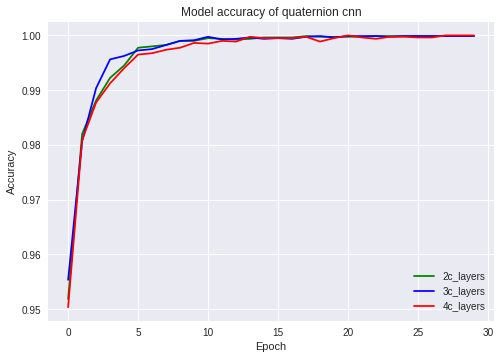

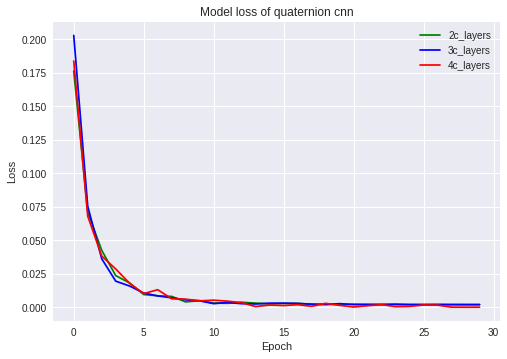

In [54]:
# Plot training accuracy values
plt.plot(history_qcnn_2c1p.history['acc'], color='green', label='2c_layers')
plt.plot(history_qcnn_3c1p.history['acc'], color='blue', label='3c_layers')
plt.plot(history_qcnn_4c1p.history['acc'], color='red', label='4c_layers')
plt.title('Model accuracy of quaternion cnn')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_qcnn_2c1p.history['loss'], color='green', label='2c_layers')
plt.plot(history_qcnn_3c1p.history['loss'], color='blue', label='3c_layers')
plt.plot(history_qcnn_4c1p.history['loss'], color='red', label='4c_layers')
plt.title('Model loss of quaternion cnn')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



# With Quan4 CNN

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
import h5py 
#data
f = h5py.File('/content/drive/My Drive/Colab Notebooks/quat4Images.mat','r') 

X_q4 = f['quat4Images'][:]
print(X_q4.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/quat4ImagesLabels.mat','r') 
y_q4 = f['quat4ImagesLabels'][:]
y_q4 = y_q4.T
print(y_q4.shape)




(10000, 4, 14, 14)
(10000, 1)


In [0]:
X_train_q4, X_test_q4, y_train_q4, y_test_q4 = train_test_split(
X_q4, y_q4, test_size=0.2, random_state=42)

In [10]:
X_train_q4 = X_train_q4.reshape(X_train_q4.shape[0], X_train_q4.shape[1], X_train_q4.shape[2], X_train_q4.shape[3],1)
X_test_q4 = X_test_q4.reshape(X_test_q4.shape[0], X_train_q4.shape[1], X_train_q4.shape[2], X_train_q4.shape[3],1)
#training_labels = training_labels[0]
y_train_q4.astype(int)
y_test_q4.astype(int)
print('Number of training examples: ' + str(X_train_q4.shape[0]))
print('Training images shape:' + str(X_train_q4.shape))
print('Training labels shape:' + str(y_train_q4.shape))
print('Test images shape:' + str(X_test_q4.shape))
print('Test labels shape:' + str(y_test_q4.shape))

Number of training examples: 8000
Training images shape:(8000, 4, 14, 14, 1)
Training labels shape:(8000, 1)
Test images shape:(2000, 4, 14, 14, 1)
Test labels shape:(2000, 1)


In [0]:
import os
import tensorflow as tf
from keras.callbacks import TensorBoard

## 2 conv layers, 1 pooling layer

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 5, 5, 16)       0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 4, 5, 5, 16)       64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total para

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_q4cnn_2c1p = model.fit(X_train_q4, y_train_q4, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_q4, y_test_q4)



Instructions for updating:
Use tf.cast instead.
Epoch 1/30
8000/8000 [==============================] - 5s 643us/sample - loss: 0.6321 - acc: 0.6505
Epoch 2/30
8000/8000 [==============================] - 2s 265us/sample - loss: 0.5364 - acc: 0.7594
Epoch 3/30
8000/8000 [==============================] - 2s 268us/sample - loss: 0.4242 - acc: 0.8627
Epoch 4/30
8000/8000 [==============================] - 2s 266us/sample - loss: 0.3129 - acc: 0.9176
Epoch 5/30
8000/8000 [==============================] - 2s 264us/sample - loss: 0.2234 - acc: 0.9523
Epoch 6/30
8000/8000 [==============================] - 2s 264us/sample - loss: 0.1391 - acc: 0.9721
Epoch 7/30
8000/8000 [==============================] - 2s 264us/sample - loss: 0.1173 - acc: 0.9778
Epoch 8/30
8000/8000 [==============================] - 2s 265us/sample - loss: 0.0941 - acc: 0.9841
Epoch 9/30
8000/8000 [==============================] - 2s 262us/sample - loss: 0.0914 - acc: 0.9850
Epoch 10/30
8000/8000 [====================

## 3 conv layers, 1 pooling layer

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 4, 8, 8, 32)       4640      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 4, 4, 4, 32)       0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 4, 4, 4, 32)       128       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               262272    
__________

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_q4cnn_3c1p = model.fit(X_train_q4, y_train_q4, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_q4, y_test_q4)




Epoch 1/30
8000/8000 [==============================] - 3s 347us/sample - loss: 0.6248 - acc: 0.6827
Epoch 2/30
8000/8000 [==============================] - 2s 312us/sample - loss: 0.1872 - acc: 0.9314
Epoch 3/30
8000/8000 [==============================] - 3s 315us/sample - loss: 0.0608 - acc: 0.9829
Epoch 4/30
8000/8000 [==============================] - 3s 313us/sample - loss: 0.0430 - acc: 0.9885
Epoch 5/30
8000/8000 [==============================] - 3s 313us/sample - loss: 0.0341 - acc: 0.9919
Epoch 6/30
8000/8000 [==============================] - 3s 313us/sample - loss: 0.0287 - acc: 0.9945
Epoch 7/30
8000/8000 [==============================] - 3s 319us/sample - loss: 0.0238 - acc: 0.9944
Epoch 8/30
8000/8000 [==============================] - 2s 312us/sample - loss: 0.0245 - acc: 0.9950
Epoch 9/30
8000/8000 [==============================] - 3s 316us/sample - loss: 0.0171 - acc: 0.9958
Epoch 10/30
8000/8000 [==============================] - 2s 312us/sample - loss: 0.0176 - a

## 4 conv layers, 1 pooling layer

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_7 (Conv3D)            (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 4, 8, 8, 32)       4640      
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 4, 6, 6, 32)       9248      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 4, 3, 3, 32)       0         
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 4, 3, 3, 32)       128       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
__________

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_q4cnn_4c1p = model.fit(X_train_q4, y_train_q4, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_q4, y_test_q4)





Epoch 1/30
8000/8000 [==============================] - 3s 402us/sample - loss: 0.4552 - acc: 0.7659
Epoch 2/30
8000/8000 [==============================] - 3s 346us/sample - loss: 0.0927 - acc: 0.9710
Epoch 3/30
8000/8000 [==============================] - 3s 351us/sample - loss: 0.0531 - acc: 0.9852
Epoch 4/30
8000/8000 [==============================] - 3s 351us/sample - loss: 0.0538 - acc: 0.9885
Epoch 5/30
8000/8000 [==============================] - 3s 352us/sample - loss: 0.0302 - acc: 0.9919
Epoch 6/30
8000/8000 [==============================] - 3s 352us/sample - loss: 0.0392 - acc: 0.9926
Epoch 7/30
8000/8000 [==============================] - 3s 349us/sample - loss: 0.0332 - acc: 0.9925
Epoch 8/30
8000/8000 [==============================] - 3s 348us/sample - loss: 0.0239 - acc: 0.9948
Epoch 9/30
8000/8000 [==============================] - 3s 349us/sample - loss: 0.0161 - acc: 0.9960
Epoch 10/30
8000/8000 [==============================] - 3s 350us/sample - loss: 0.0213 - a

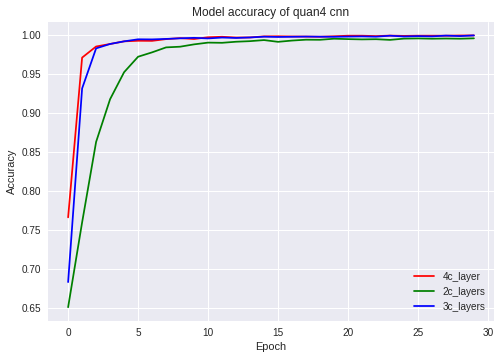

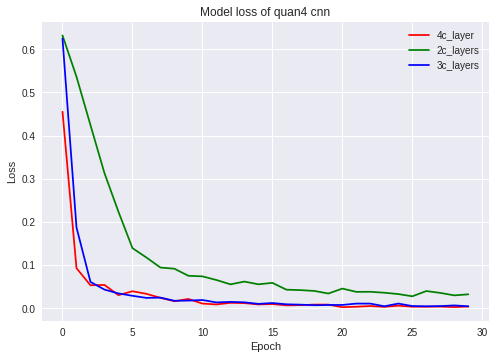

In [21]:
# Plot training accuracy values
plt.plot(history_q4cnn_4c1p.history['acc'], color='red', label='4c_layer')
plt.plot(history_q4cnn_2c1p.history['acc'], color='green', label='2c_layers')
plt.plot(history_q4cnn_3c1p.history['acc'], color='blue', label='3c_layers')
plt.title('Model accuracy of quan4 cnn')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_q4cnn_4c1p.history['loss'], color='red', label='4c_layer')
plt.plot(history_q4cnn_2c1p.history['loss'], color='green', label='2c_layers')
plt.plot(history_q4cnn_3c1p.history['loss'], color='blue', label='3c_layers')
plt.title('Model loss of quan4 cnn')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



# With Wavelet CNN

In [22]:
f = h5py.File('/content/drive/My Drive/Colab Notebooks/waveletImages.mat','r') 

X_w = f['waveletImages'][:]
print(X_w.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/waveletImagesLabels.mat','r') 
y_w = f['waveletImagesLabels'][:]
y_w = y_w.T
print(y_w.shape)

(10000, 4, 14, 14)
(10000, 1)


In [0]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
X_w, y_w, test_size=0.2, random_state=42)

In [24]:
X_train_w = X_train_w.reshape(X_train_w.shape[0], X_train_w.shape[1], X_train_w.shape[2], X_train_w.shape[3],1)
X_test_w = X_test_w.reshape(X_test_w.shape[0], X_train_w.shape[1], X_train_w.shape[2], X_train_w.shape[3],1)
#training_labels = training_labels[0]
y_train_w.astype(int)
y_test_w.astype(int)
print('Number of training examples: ' + str(X_train_w.shape[0]))
print('Training images shape:' + str(X_train_w.shape))
print('Training labels shape:' + str(y_train_w.shape))
print('Test images shape:' + str(X_test_w.shape))
print('Test labels shape:' + str(y_test_w.shape))

Number of training examples: 8000
Training images shape:(8000, 4, 14, 14, 1)
Training labels shape:(8000, 1)
Test images shape:(2000, 4, 14, 14, 1)
Test labels shape:(2000, 1)


## 2 conv layers, 1 pooling layer

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_11 (Conv3D)           (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 4, 5, 5, 16)       0         
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 4, 5, 5, 16)       64        
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total para

In [26]:

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_wcnn_2c1p = model.fit(X_train_w, y_train_w, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_w, y_test_w)

Epoch 1/30
8000/8000 [==============================] - 3s 314us/sample - loss: 0.1089 - acc: 0.9621
Epoch 2/30
8000/8000 [==============================] - 2s 273us/sample - loss: 0.0422 - acc: 0.9855
Epoch 3/30
8000/8000 [==============================] - 2s 267us/sample - loss: 0.0317 - acc: 0.9895
Epoch 4/30
8000/8000 [==============================] - 2s 270us/sample - loss: 0.0209 - acc: 0.9924
Epoch 5/30
8000/8000 [==============================] - 2s 269us/sample - loss: 0.0144 - acc: 0.9951
Epoch 6/30
8000/8000 [==============================] - 2s 267us/sample - loss: 0.0134 - acc: 0.9955
Epoch 7/30
8000/8000 [==============================] - 2s 271us/sample - loss: 0.0087 - acc: 0.9975
Epoch 8/30
8000/8000 [==============================] - 2s 267us/sample - loss: 0.0049 - acc: 0.9980
Epoch 9/30
8000/8000 [==============================] - 2s 268us/sample - loss: 0.0037 - acc: 0.9989
Epoch 10/30
8000/8000 [==============================] - 2s 268us/sample - loss: 0.0024 - a

## 4 conv layers, 1 pooling layer

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_13 (Conv3D)           (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 4, 8, 8, 32)       4640      
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 4, 6, 6, 32)       9248      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 4, 3, 3, 32)       0         
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 4, 3, 3, 32)       128       
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
__________

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_wcnn_4c1p = model.fit(X_train_w, y_train_w, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_w, y_test_w)

Epoch 1/30
8000/8000 [==============================] - 3s 393us/sample - loss: 0.1105 - acc: 0.9589
Epoch 2/30
8000/8000 [==============================] - 3s 345us/sample - loss: 0.0456 - acc: 0.9862
Epoch 3/30
8000/8000 [==============================] - 3s 349us/sample - loss: 0.0268 - acc: 0.9926
Epoch 4/30
8000/8000 [==============================] - 3s 348us/sample - loss: 0.0118 - acc: 0.9965
Epoch 5/30
8000/8000 [==============================] - 3s 363us/sample - loss: 0.0085 - acc: 0.9967
Epoch 6/30
8000/8000 [==============================] - 3s 359us/sample - loss: 0.0051 - acc: 0.9981
Epoch 7/30
8000/8000 [==============================] - 3s 371us/sample - loss: 0.0028 - acc: 0.9989
Epoch 8/30
8000/8000 [==============================] - 3s 372us/sample - loss: 0.0015 - acc: 0.9994
Epoch 9/30
8000/8000 [==============================] - 3s 380us/sample - loss: 7.0004e-04 - acc: 0.9996
Epoch 10/30
8000/8000 [==============================] - 3s 386us/sample - loss: 5.2491

## 3 conv layers, 1 pooling layer

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_20 (Conv3D)           (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 4, 8, 8, 32)       4640      
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 4, 4, 4, 32)       0         
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 4, 4, 4, 32)       128       
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               262272    
__________

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_wcnn_3c1p = model.fit(X_train_w, y_train_w, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_w, y_test_w)

Epoch 1/30
8000/8000 [==============================] - 3s 360us/sample - loss: 0.1226 - acc: 0.9617
Epoch 2/30
8000/8000 [==============================] - 3s 321us/sample - loss: 0.0395 - acc: 0.9881
Epoch 3/30
8000/8000 [==============================] - 3s 318us/sample - loss: 0.0227 - acc: 0.9931
Epoch 4/30
8000/8000 [==============================] - 3s 323us/sample - loss: 0.0140 - acc: 0.9958
Epoch 5/30
8000/8000 [==============================] - 3s 322us/sample - loss: 0.0056 - acc: 0.9976
Epoch 6/30
8000/8000 [==============================] - 3s 323us/sample - loss: 0.0034 - acc: 0.9986
Epoch 7/30
8000/8000 [==============================] - 3s 324us/sample - loss: 0.0032 - acc: 0.9984
Epoch 8/30
8000/8000 [==============================] - 3s 320us/sample - loss: 8.8092e-04 - acc: 0.9999
Epoch 9/30
8000/8000 [==============================] - 3s 317us/sample - loss: 0.0013 - acc: 0.9995
Epoch 10/30
8000/8000 [==============================] - 3s 320us/sample - loss: 0.0015

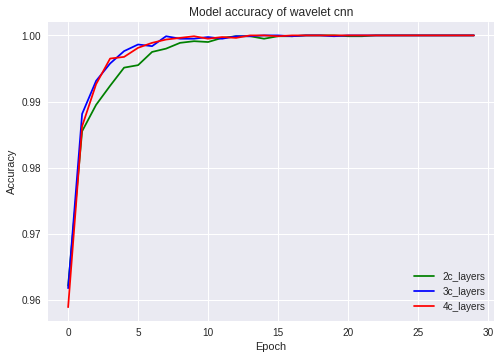

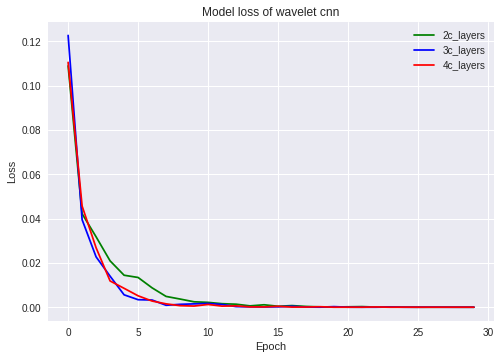

In [34]:
# Plot training accuracy values
plt.plot(history_wcnn_2c1p.history['acc'], color='green', label='2c_layers')
plt.plot(history_wcnn_3c1p.history['acc'], color='blue', label='3c_layers')
plt.plot(history_wcnn_4c1p.history['acc'], color='red', label='4c_layers')
plt.title('Model accuracy of wavelet cnn')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_2c1p.history['loss'], color='green', label='2c_layers')
plt.plot(history_wcnn_3c1p.history['loss'], color='blue', label='3c_layers')
plt.plot(history_wcnn_4c1p.history['loss'], color='red', label='4c_layers')
plt.title('Model loss of wavelet cnn')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





# With original CNN

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

folder = "/content/drive/My Drive/Colab Notebooks/mnistdata"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(42, 45):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=28, height=28))

# Any results you write to the current directory are saved as output.

Working with 10000 images
Image examples: 
0_2655.png


1_6341.png


1_9072.png


In [59]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 28
image_height = 28
channels = 3

nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

print(dataset.shape)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape(3,28,28)
    # Normalize
    x = x / 255.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 10000
(10000, 3, 28, 28)
250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
5750 images to array
6000 images to array
6250 images to array
6500 images to array
6750 images to array
7000 images to array
7250 images to array
7500 images to array
7750 images to array
8000 images to array
8250 images to array
8500 images to array
8750 images to array
9000 images to array
9250 images to array
9500 images to array
9750 images to array
10000 images to array
All images to array!


In [0]:
import scipy.io
scipy.io.savemat("mnist_data.mat", mdict={'mnist_10000': X})

In [60]:
X = dataset.reshape(len(train_files), image_height, image_width,channels)
print(X.shape)

(10000, 28, 28, 3)


In [0]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
X, y_train, test_size=0.2, random_state=42)

In [62]:
print(X_train_cnn.shape)
print(X_test_cnn.shape)
print(len(y_train_cnn))
print(len(y_test_cnn))

(8000, 28, 28, 3)
(2000, 28, 28, 3)
8000
2000


## 3 conv layers, 1pool

In [69]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         224       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_v1_16 (B (None, 11, 11, 32)        128       
_________________________________________________________________
flatten_16 (Flatten)         (None, 3872)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               495744    
__________

In [70]:


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_cnn_3c1p = model.fit(X_train_cnn, y_train_cnn, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_cnn, y_test_cnn)

Epoch 1/30
8000/8000 [==============================] - 5s 623us/sample - loss: 0.1407 - acc: 0.9540
Epoch 2/30
8000/8000 [==============================] - 4s 481us/sample - loss: 0.0472 - acc: 0.9844
Epoch 3/30
8000/8000 [==============================] - 4s 553us/sample - loss: 0.0324 - acc: 0.9895
Epoch 4/30
8000/8000 [==============================] - 4s 550us/sample - loss: 0.0185 - acc: 0.9940
Epoch 5/30
8000/8000 [==============================] - 4s 552us/sample - loss: 0.0131 - acc: 0.9950
Epoch 6/30
8000/8000 [==============================] - 4s 511us/sample - loss: 0.0104 - acc: 0.9967
Epoch 7/30
8000/8000 [==============================] - 4s 481us/sample - loss: 0.0070 - acc: 0.9971
Epoch 8/30
8000/8000 [==============================] - 4s 478us/sample - loss: 0.0081 - acc: 0.9967
Epoch 9/30
8000/8000 [==============================] - 4s 502us/sample - loss: 0.0062 - acc: 0.9974
Epoch 10/30
8000/8000 [==============================] - 4s 486us/sample - loss: 0.0031 - a

## 2 conv layers, 1 pool

In [76]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 8)         224       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
batch_normalization_v1_19 (B (None, 12, 12, 16)        64        
_________________________________________________________________
flatten_19 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
Total para

In [77]:


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_cnn_2c1p = model.fit(X_train_cnn, y_train_cnn, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_cnn, y_test_cnn)

Epoch 1/30
8000/8000 [==============================] - 5s 615us/sample - loss: 0.1305 - acc: 0.9551
Epoch 2/30
8000/8000 [==============================] - 4s 455us/sample - loss: 0.0472 - acc: 0.9849
Epoch 3/30
8000/8000 [==============================] - 4s 458us/sample - loss: 0.0351 - acc: 0.9889
Epoch 4/30
8000/8000 [==============================] - 4s 483us/sample - loss: 0.0300 - acc: 0.9904
Epoch 5/30
8000/8000 [==============================] - 4s 449us/sample - loss: 0.0186 - acc: 0.9935
Epoch 6/30
8000/8000 [==============================] - 3s 435us/sample - loss: 0.0166 - acc: 0.9939
Epoch 7/30
8000/8000 [==============================] - 4s 448us/sample - loss: 0.0123 - acc: 0.9961
Epoch 8/30
8000/8000 [==============================] - 4s 457us/sample - loss: 0.0102 - acc: 0.9966
Epoch 9/30
8000/8000 [==============================] - 4s 459us/sample - loss: 0.0067 - acc: 0.9979
Epoch 10/30
8000/8000 [==============================] - 4s 458us/sample - loss: 0.0058 - a

## 4 conv layers, 1 pool

In [73]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 8)         224       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_v1_18 (B (None, 10, 10, 32)        128       
_________________________________________________________________
flatten_18 (Flatten)         (None, 3200)              0         
__________

In [74]:


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_cnn_4c1p = model.fit(X_train_cnn, y_train_cnn, epochs=30, verbose=1)
test_loss = model.evaluate(X_test_cnn, y_test_cnn)

Epoch 1/30
8000/8000 [==============================] - 6s 719us/sample - loss: 0.1210 - acc: 0.9599
Epoch 2/30
8000/8000 [==============================] - 4s 527us/sample - loss: 0.0436 - acc: 0.9865
Epoch 3/30
8000/8000 [==============================] - 4s 551us/sample - loss: 0.0223 - acc: 0.9915
Epoch 4/30
8000/8000 [==============================] - 4s 539us/sample - loss: 0.0185 - acc: 0.9944
Epoch 5/30
8000/8000 [==============================] - 4s 544us/sample - loss: 0.0136 - acc: 0.9955
Epoch 6/30
8000/8000 [==============================] - 4s 532us/sample - loss: 0.0060 - acc: 0.9979
Epoch 7/30
8000/8000 [==============================] - 4s 533us/sample - loss: 0.0072 - acc: 0.9975
Epoch 8/30
8000/8000 [==============================] - 4s 538us/sample - loss: 0.0057 - acc: 0.9977
Epoch 9/30
8000/8000 [==============================] - 4s 554us/sample - loss: 0.0034 - acc: 0.9986
Epoch 10/30
8000/8000 [==============================] - 4s 536us/sample - loss: 0.0039 - a

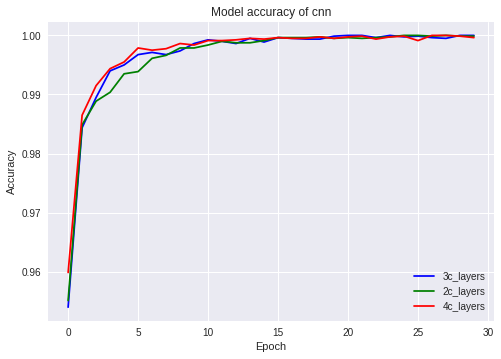

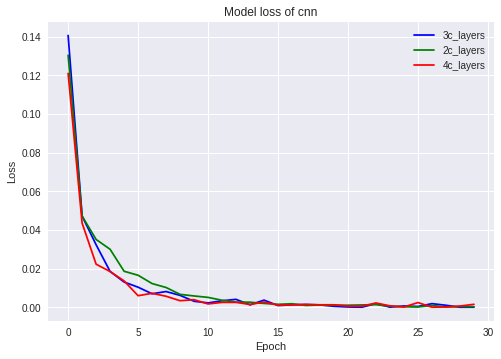

In [78]:
# Plot training accuracy values
plt.plot(history_cnn_3c1p.history['acc'], color='blue', label='3c_layers')
plt.plot(history_cnn_2c1p.history['acc'], color='green', label='2c_layers')
plt.plot(history_cnn_4c1p.history['acc'], color='red', label='4c_layers')
plt.title('Model accuracy of cnn')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_cnn_3c1p.history['loss'], color='blue', label='3c_layers')
plt.plot(history_cnn_2c1p.history['loss'], color='green', label='2c_layers')
plt.plot(history_cnn_4c1p.history['loss'], color='red', label='4c_layers')
plt.title('Model loss of cnn')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





# Comparison

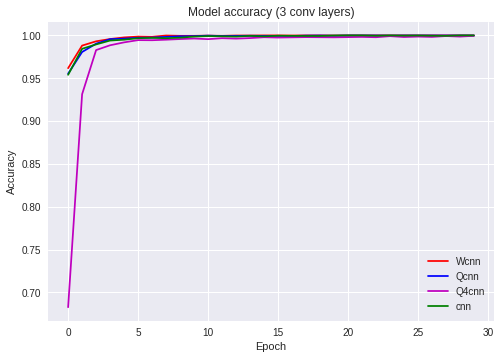

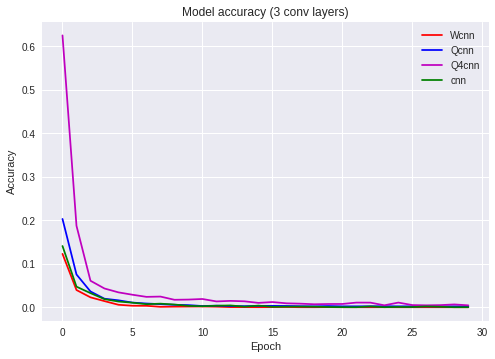

In [80]:
# Plot training accuracy values
plt.plot(history_wcnn_3c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_3c1p.history['acc'], color='blue', label='Qcnn')
plt.plot(history_q4cnn_3c1p.history['acc'], color='m', label='Q4cnn')
plt.plot(history_cnn_3c1p.history['acc'], color='green', label='cnn')
plt.title('Model accuracy (3 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_3c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_3c1p.history['loss'], color='blue', label='Qcnn')
plt.plot(history_q4cnn_3c1p.history['loss'], color='m', label='Q4cnn')
plt.plot(history_cnn_3c1p.history['loss'], color='green', label='cnn')
plt.title('Model accuracy (3 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()







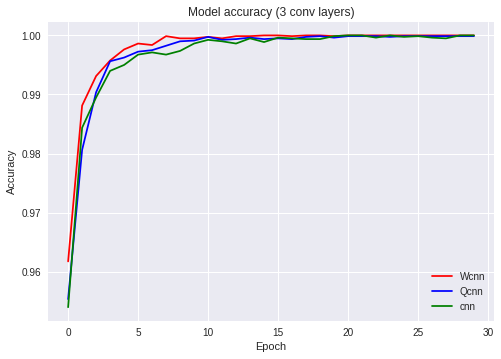

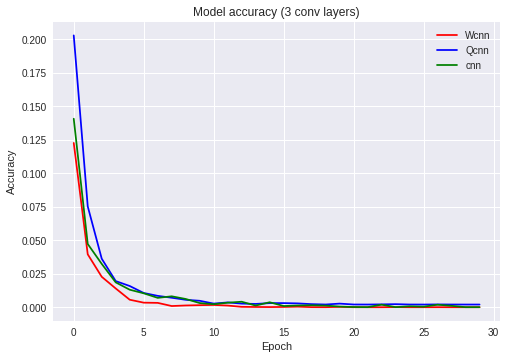

In [81]:
# Plot training accuracy values
plt.plot(history_wcnn_3c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_3c1p.history['acc'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_3c1p.history['acc'], color='m', label='Q4cnn')
plt.plot(history_cnn_3c1p.history['acc'], color='green', label='cnn')
plt.title('Model accuracy (3 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_3c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_3c1p.history['loss'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_3c1p.history['loss'], color='m', label='Q4cnn')
plt.plot(history_cnn_3c1p.history['loss'], color='green', label='cnn')
plt.title('Model accuracy (3 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()






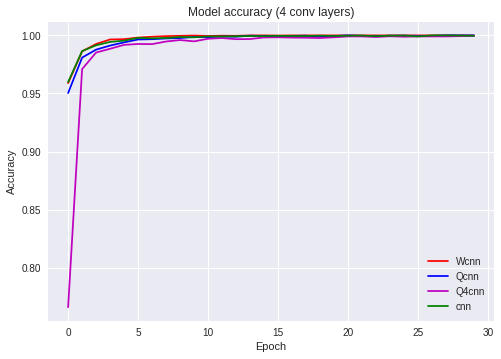

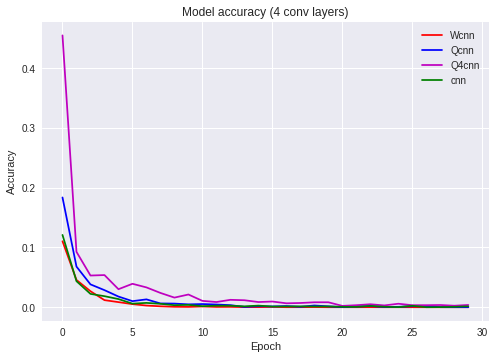

In [82]:
# Plot training accuracy values
plt.plot(history_wcnn_4c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_4c1p.history['acc'], color='blue', label='Qcnn')
plt.plot(history_q4cnn_4c1p.history['acc'], color='m', label='Q4cnn')
plt.plot(history_cnn_4c1p.history['acc'], color='green', label='cnn')
plt.title('Model accuracy (4 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_4c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_4c1p.history['loss'], color='blue', label='Qcnn')
plt.plot(history_q4cnn_4c1p.history['loss'], color='m', label='Q4cnn')
plt.plot(history_cnn_4c1p.history['loss'], color='green', label='cnn')
plt.title('Model accuracy (4 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()







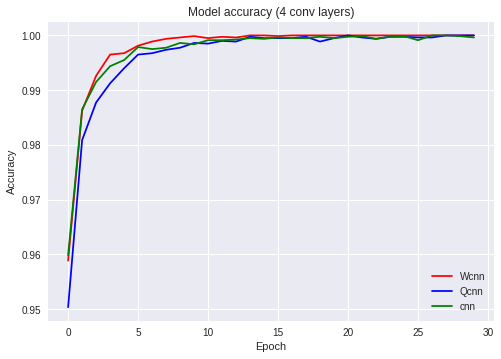

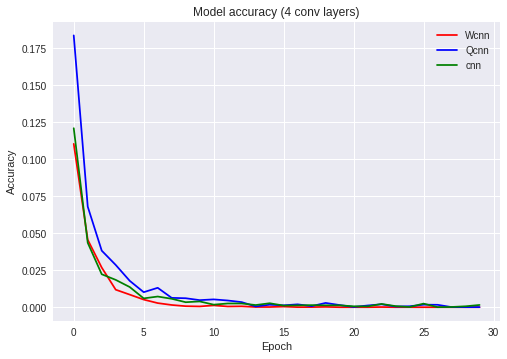

In [83]:
# Plot training accuracy values
plt.plot(history_wcnn_4c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_4c1p.history['acc'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_4c1p.history['acc'], color='m', label='Q4cnn')
plt.plot(history_cnn_4c1p.history['acc'], color='green', label='cnn')
plt.title('Model accuracy (4 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_4c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_4c1p.history['loss'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_4c1p.history['loss'], color='m', label='Q4cnn')
plt.plot(history_cnn_4c1p.history['loss'], color='green', label='cnn')
plt.title('Model accuracy (4 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()





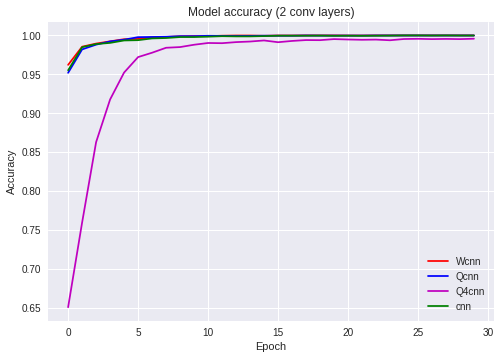

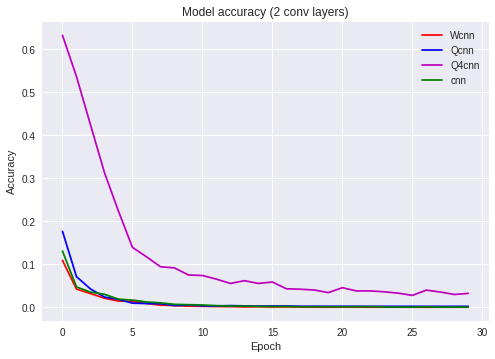

In [84]:
# Plot training accuracy values
plt.plot(history_wcnn_2c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_2c1p.history['acc'], color='blue', label='Qcnn')
plt.plot(history_q4cnn_2c1p.history['acc'], color='m', label='Q4cnn')
plt.plot(history_cnn_2c1p.history['acc'], color='green', label='cnn')
plt.title('Model accuracy (2 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_2c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_2c1p.history['loss'], color='blue', label='Qcnn')
plt.plot(history_q4cnn_2c1p.history['loss'], color='m', label='Q4cnn')
plt.plot(history_cnn_2c1p.history['loss'], color='green', label='cnn')
plt.title('Model accuracy (2 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()





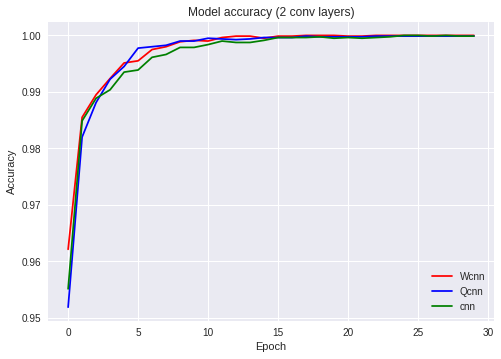

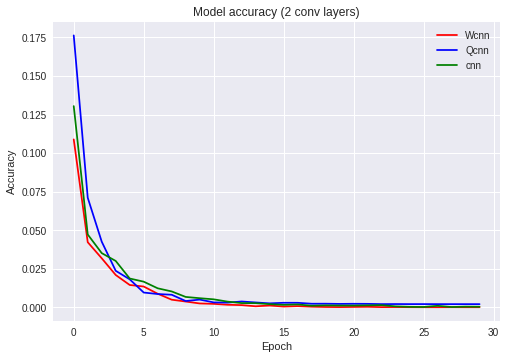

In [85]:
# Plot training accuracy values
plt.plot(history_wcnn_2c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_2c1p.history['acc'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_2c1p.history['acc'], color='m', label='Q4cnn')
plt.plot(history_cnn_2c1p.history['acc'], color='green', label='cnn')
plt.title('Model accuracy (2 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_2c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_2c1p.history['loss'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_2c1p.history['loss'], color='m', label='Q4cnn')
plt.plot(history_cnn_2c1p.history['loss'], color='green', label='cnn')
plt.title('Model accuracy (2 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()




